# Base de dados Mnist

In [46]:
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # quando um neuronio está ligado à todos os neuronios da proximas camada 
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

In [47]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [48]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

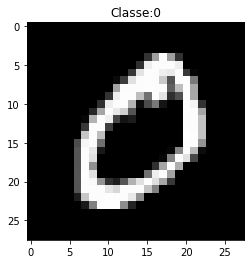

In [49]:
plt.imshow(X_treinamento[1], cmap='gray')
plt.title('Classe:' + str(y_treinamento[1]))
plt.show()

In [50]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [51]:
# transformando a matriz de 28x28 em um vetor
X_treinamento = X_treinamento.reshape(60000,28*28)
X_treinamento.shape

(60000, 784)

In [12]:
X_treinamento[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [57]:
# transformando a matriz de 28x28 em um vetor
X_teste = X_teste.reshape(10000,28*28)
X_teste.shape

(10000, 784)

In [58]:
y_treinamento, y_teste

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

# Pré-processamento dos dados

In [59]:
# transformando os dados em float32
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [60]:
X_treinamento[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [61]:
# normalizando os dados
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [62]:
X_treinamento[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [63]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [64]:
y_treinamento = np_utils.to_categorical(y_treinamento)

In [65]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [66]:
y_teste = np_utils.to_categorical(y_teste)

In [67]:
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Construção e treinamento da rede neural

In [27]:
rede_neural = Sequential()
# input_shape = qtde de neuronios para qtde de entrada. Aqui no exemplo para cada px será um neuronio
# units = qde de camadas escondidas na primeira camada
# relu para resultado negativos é zerado
# softmax será retornado uma probabilidade para cada classe
# 784 -> 397 -> 397 -> 10
rede_neural .add(Dense(input_shape= (784,), units = 397, activation = 'relu'))
rede_neural.add(Dense(units = 397, activation='relu'))
rede_neural.add(Dense(units = 10, activation='softmax'))

In [28]:
rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size = 128, epochs = 20, verbose = 1)

Epoch 1/20
Extension horovod.torch has not been built: /usr/local/lib/python3.8/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-38-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.
[2023-04-08 19:05:51.413 tensorflow-2-6-cpu-py-ml-t3-medium-9169b2e75617c45c79c40579f6a8:54 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-04-08 19:05:51.625 tensorflow-2-6-cpu-py-ml-t3-medium-9169b2e75617c45c79c40579f6a8:54 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
469/469 [==============================] - 4s 7ms/step - loss: 0.2321 - accuracy: 0.9334
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0856 - accuracy: 0.9733
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 4/20

# Avaliação e previsões

In [30]:
rede_neural.evaluate(X_teste, y_teste)

313/313 [==============================] - 1s 3ms/step - loss: 0.1236 - accuracy: 0.9747


[0.12356079369783401, 0.9746999740600586]

In [31]:
previsoes = rede_neural.predict(X_teste)

In [32]:
previsoes

array([[4.5559310e-15, 1.3569536e-12, 1.0231122e-13, ..., 1.0000000e+00,
        4.0955528e-13, 1.1686628e-09],
       [7.3185944e-21, 1.2421303e-14, 1.0000000e+00, ..., 5.8018241e-20,
        8.4647247e-20, 2.7369092e-28],
       [2.5375470e-12, 9.9999821e-01, 1.9691438e-08, ..., 1.3473465e-07,
        1.6331270e-06, 2.5994196e-11],
       ...,
       [1.9666045e-21, 2.1444421e-13, 1.8994370e-19, ..., 6.5205702e-15,
        7.0846684e-12, 2.4769225e-11],
       [4.5612961e-26, 1.6973695e-22, 1.0006912e-29, ..., 2.6951540e-22,
        4.1466579e-14, 1.6880621e-25],
       [1.3242485e-16, 7.8870497e-18, 2.3770458e-18, ..., 2.6294101e-21,
        2.5000998e-18, 7.6808784e-16]], dtype=float32)

In [68]:
# uma probabilidade para cada imagem
previsoes.shape

(10000, 10)

In [69]:
previsoes[0]

array([4.5559310e-15, 1.3569536e-12, 1.0231122e-13, 2.3799012e-09,
       2.4479797e-16, 9.8090513e-16, 1.2211804e-22, 1.0000000e+00,
       4.0955528e-13, 1.1686628e-09], dtype=float32)

In [70]:
import numpy as np
np.argmax(y_teste[0])

7

In [71]:
np.argmax(previsoes[0])

7

TypeError: Invalid shape (784,) for image data

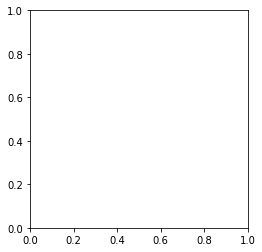

In [72]:
plt.imshow(X_teste[0], cmap='gray')
plt.title('Classe: ' +  str(y_teste[0]))
plt.show()

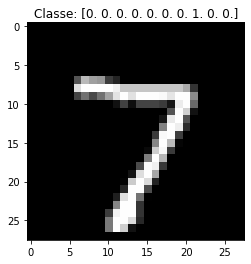

In [37]:
plt.imshow(X_teste[0].reshape(28,28), cmap='gray')
plt.title('Classe: ' +  str(y_teste[0]))
plt.show()

In [40]:
rede_neural.save('modelo_final_tensorflow.h5')

In [54]:
nova_rede_neural = tensorflow.keras.models.load_model('modelo_final_tensorflow.h5')

In [55]:
nova_rede_neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 397)               311645    
_________________________________________________________________
dense_1 (Dense)              (None, 397)               158006    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3980      
Total params: 473,631
Trainable params: 473,631
Non-trainable params: 0
_________________________________________________________________


In [73]:
nova_rede_neural.predict(X_teste)

array([[4.5559310e-15, 1.3569536e-12, 1.0231122e-13, ..., 1.0000000e+00,
        4.0955528e-13, 1.1686628e-09],
       [7.3185944e-21, 1.2421303e-14, 1.0000000e+00, ..., 5.8018241e-20,
        8.4647247e-20, 2.7369092e-28],
       [2.5375470e-12, 9.9999821e-01, 1.9691438e-08, ..., 1.3473465e-07,
        1.6331270e-06, 2.5994196e-11],
       ...,
       [1.9666045e-21, 2.1444421e-13, 1.8994370e-19, ..., 6.5205702e-15,
        7.0846684e-12, 2.4769225e-11],
       [4.5612961e-26, 1.6973695e-22, 1.0006912e-29, ..., 2.6951540e-22,
        4.1466579e-14, 1.6880621e-25],
       [1.3242485e-16, 7.8870497e-18, 2.3770458e-18, ..., 2.6294101e-21,
        2.5000998e-18, 7.6808784e-16]], dtype=float32)